In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv("C:\\Users\\loges\\Downloads\\archive (2)\\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
X=df.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
y=df.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [15]:
dummies=pd.get_dummies(X['Geography'],drop_first=True)
X=pd.concat([X,dummies],axis=1)
X.drop('Geography',axis=1,inplace=True)
dummies=pd.get_dummies(X['Gender'],drop_first=True)
X=pd.concat([X,dummies],axis=1)
X.drop('Gender',axis=1,inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout
X.shape

(10000, 11)

In [17]:
# create a model
classifier=Sequential()
# input layer
classifier.add(Dense(units=11,activation='relu'))
# first hidden layer
classifier.add(Dense(units=7,activation='relu'))
# second
classifier.add(Dense(units=6,activation='relu'))
#output
classifier.add(Dense(units=1,activation='sigmoid'))

In [19]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
import tensorflow
early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False

)

In [21]:
model_history=classifier.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7746 - loss: 0.4912 - val_accuracy: 0.8289 - val_loss: 0.3941
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8148 - loss: 0.3935 - val_accuracy: 0.8387 - val_loss: 0.3760
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8512 - loss: 0.3478 - val_accuracy: 0.8516 - val_loss: 0.3743
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8585 - loss: 0.3323 - val_accuracy: 0.8569 - val_loss: 0.3585
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8586 - loss: 0.3439 - val_accuracy: 0.8554 - val_loss: 0.3518
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8637 - loss: 0.3280 - val_accuracy: 0.8535 - val_loss: 0.3659
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8657 - loss: 0.3286 - val_accuracy: 0.8368 - val_loss: 0.3732
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8585 - loss: 0.3306 - 

In [22]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

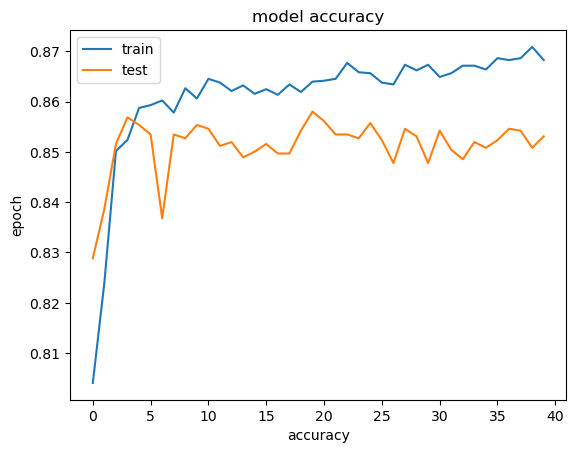

In [23]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()


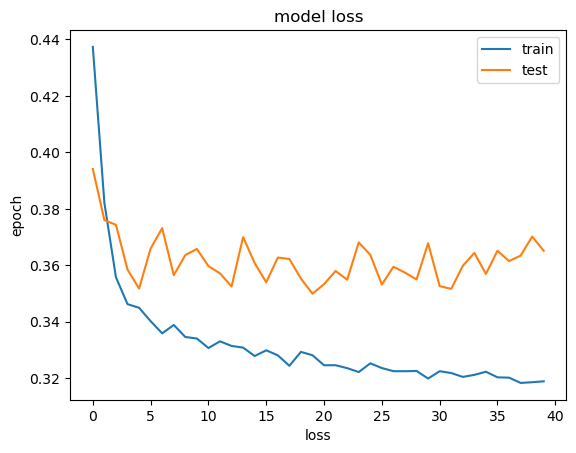

In [24]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("model loss")
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()

In [25]:
y_pred=classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [26]:
len(y_pred)

y_pred=(y_pred>=.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

<Axes: >

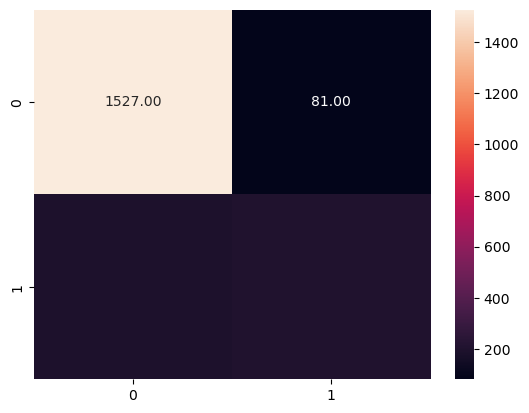

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm,fmt='.2f',annot=True)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

#get the weights
classifier.get_weights()

[array([[-2.57678598e-01,  1.00107372e+00,  2.72234827e-01,
          9.03776288e-02, -6.40006438e-02, -3.71578366e-01,
          6.83251070e-04, -8.11772406e-01, -3.68996471e-01,
          9.07397330e-01,  9.84479338e-02],
        [-9.34175700e-02,  1.54369748e+00,  7.29957879e-01,
         -3.30242157e+00, -3.53198838e+00, -5.92140913e-01,
         -3.19899845e+00,  2.71579337e+00,  3.66198587e+00,
         -8.05443168e-01, -1.39537477e+00],
        [-2.55414061e-02,  2.14644998e-01,  7.85366416e-01,
          2.20960662e-01, -1.22110212e+00, -6.82291165e-02,
          3.35099161e-01,  1.01215735e-01, -6.74001098e-01,
          4.67047095e-01,  3.40107292e-01],
        [-2.94838262e+00, -1.50434422e+00,  9.95234013e-01,
          5.90547882e-02,  3.31462651e-01,  3.42083871e-01,
         -7.92772412e-01, -1.48737267e-01, -1.12941906e-01,
          2.29813099e+00, -2.07104468e+00],
        [-3.42119718e+00, -9.72970784e-01,  2.09343219e+00,
          6.44706070e-01,  3.96260321e-01,  